# Analisis de los datos

## Importaciones

### Librerías

In [1]:
from src.exploring_functions import *

In [2]:
import numpy as np
import pandas as pd

In [3]:
import pylab as plt
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Datos

In [5]:
test = pd.read_csv('/media/rodrigo/Rodrigo/test.csv')
train = pd.read_csv('/media/rodrigo/Rodrigo/train.csv')

## Analisis rápido de los datos

### Primer vistazo

In [6]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [8]:
train.shape, test.shape

((200000, 202), (200000, 201))

In [9]:
column_type(train)

El número de columnas enteras es: 1
El número de columnas float es: 200
El número de columnas object es: 1


In [10]:
column_type(test)

El número de columnas enteras es: 0
El número de columnas float es: 200
El número de columnas object es: 1


### Limpieza rápida

La columna 'ID_code' no aporta ningún tipo de información, por lo que se va a eliminar

In [11]:
train.drop(columns=['ID_code'], inplace = True)
test.drop(columns=['ID_code'], inplace = True)

In [12]:
train[train.duplicated()]

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199


No hay datos duplicados

In [13]:
train.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [14]:
test.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 200 entries, var_0 to var_199
dtypes: float64(200)
memory usage: 305.2 MB


Los dos dataframe ocupan bastante memoria, se va a reducir al máximo su tamaño

In [15]:
donwcast_df(train)

Memory usage of properties dataframe is : 306.7017822265625  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  152.77874755859375  MB
This is  49.81345281056605 % of the initial size


In [16]:
donwcast_df(test)

Memory usage of properties dataframe is : 305.1759033203125  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  152.5880126953125  MB
This is  50.000019999992 % of the initial size


### Información más detallada

In [17]:
null_sum(train)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
null_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int8,float32,float32,float32,float32,float32,float32,float32,float32,float32,...,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32


In [18]:
null_sum(test)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
null_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,...,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32


In [19]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715190,6.796530,11.078333,-5.065317,5.408949,16.545851,0.284162,...,3.234439,7.438409,1.927838,3.331773,17.993788,-0.142088,2.303335,8.908157,15.870723,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863266,0.866607,3.418076,3.332633,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010946,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562599,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852798
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064724,4.836800
max,1.000000,20.315001,10.376800,19.353001,13.188300,16.671400,17.251600,8.447700,27.691799,10.151300,...,18.440901,16.716499,8.402400,18.281799,27.928801,4.272900,18.321501,12.000400,26.079100,28.500700


In [20]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707451,6.788214,11.076399,-5.050557,5.415163,16.529144,0.277135,7.569407,...,3.189766,7.458268,1.925944,3.322016,17.996969,-0.133657,2.290899,8.912429,15.869184,-3.246341
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231866,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446345,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457802
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391726,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292801,9.665500,11.003600,...,20.358999,16.716499,8.005000,17.632601,27.947800,4.545400,15.920700,12.275800,26.538401,27.907400


El porcentaje de 1 en el target es: 0.89951
El porcentaje de 0 en el target es: 0.10049


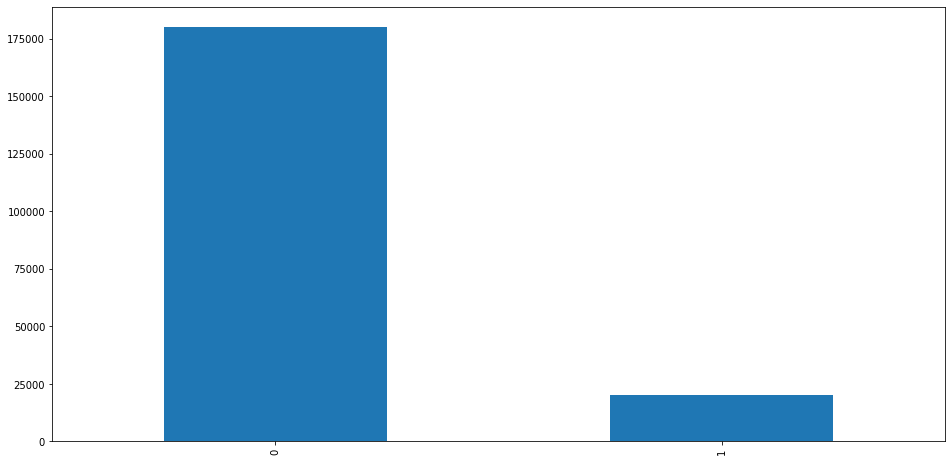

In [21]:
train.target.value_counts().plot(kind='bar', figsize=(16,8));
print('El porcentaje de 1 en el target es:', list(train.target.value_counts())[0]/train.shape[0])
print('El porcentaje de 0 en el target es:', list(train.target.value_counts())[1]/train.shape[0])

Hay una mayor cantidad de 0 que de 1 en la columna de target, esto va a generar un sesgo en las predicciones, por lo que va a tener que remediarse

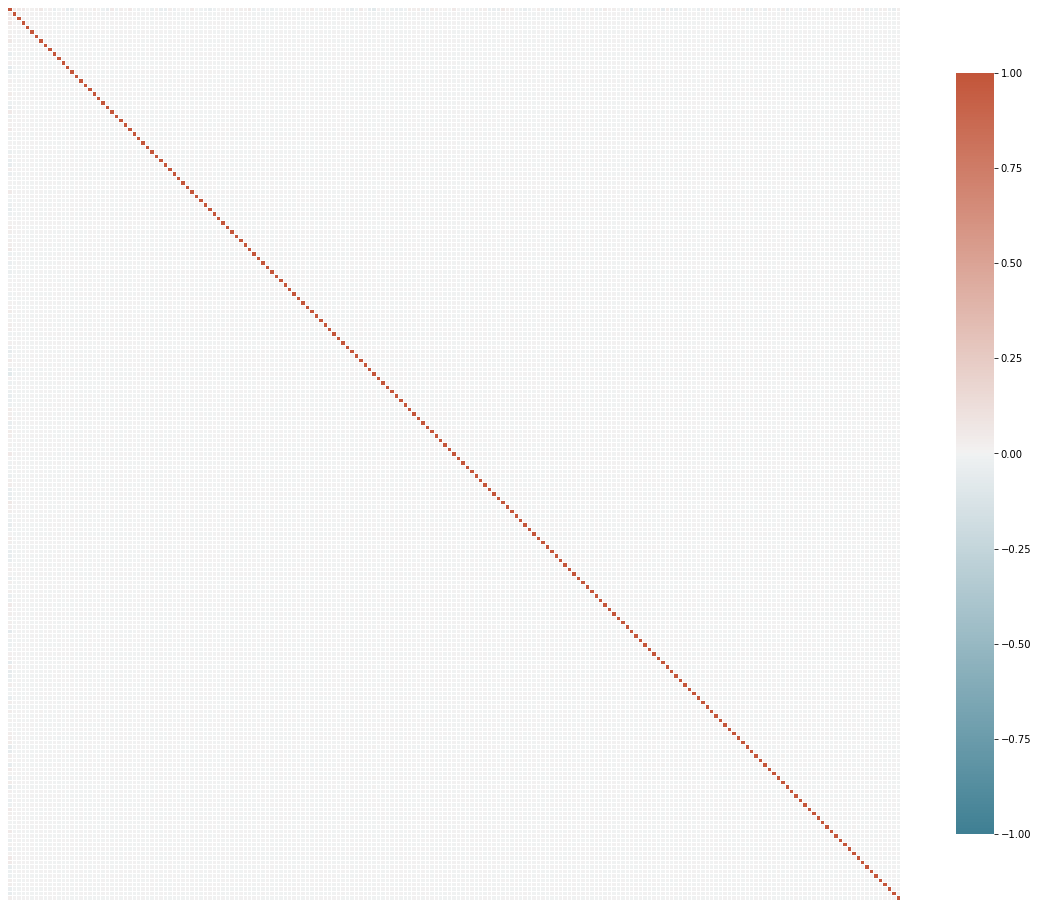

In [22]:
plt.figure(figsize=(20,20)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(train.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=False,
            cbar_kws={"shrink": .7
                     },# barra lateral
            xticklabels=False,
            yticklabels=False
);

Se comprueba que no hay correlacion entre columnas

Ahora se va a hacer un estudio de outliers de las primeras 30 columnas

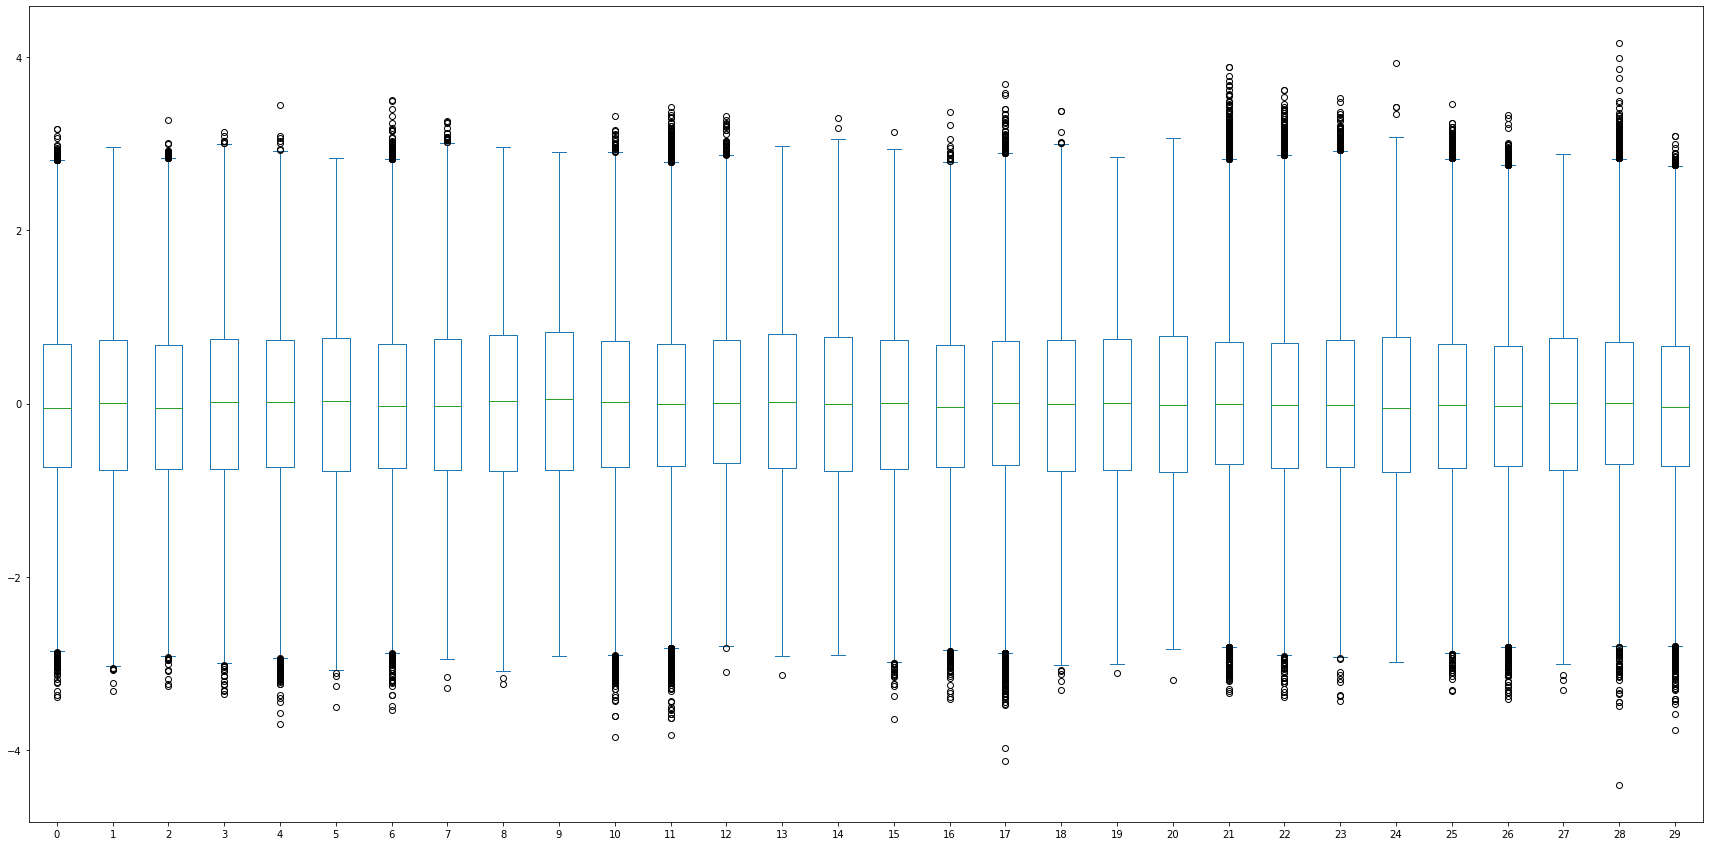

In [23]:
pd.DataFrame(StandardScaler().fit_transform(train.drop(columns=['target'])))[list(map(int, list(range(30))))].plot(kind='box', figsize = (30,15));

Se comprueba como si que hay presencia de outliers

In [24]:
from scipy.stats import zscore

print('Si se eliminasen todos los datos que se ubiquen a más de 3 desviaciones estandar de la media el número de de filas en el dataframe se reduciría en un ',
     round(1-train[(np.abs(zscore(train.drop(columns=['target']))) < 3).all(axis=1)].shape[0]/train.shape[0],3),'%')

Si se eliminasen todos los datos que se ubiquen a más de 3 desviaciones estandar de la media el número de de filas en el dataframe se reduciría en un  0.055 %


### Exportación de datos modificados

In [25]:
train.to_csv('/media/rodrigo/Rodrigo/train_modified.csv', index = False)
test.to_csv('/media/rodrigo/Rodrigo/test_modified.csv', index = False)

## Importacia relativa de columnas

Ahora se va a examinar, con la ayuda de un random forest classifier, la importancia  relativa de las diferentes columnas

In [26]:
forest = RandomForestClassifier(random_state=0)
forest.fit(train.drop(columns=['target']), train.target)

In [ ]:
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=train.drop(columns=['target']).columns)

In [ ]:
round(importances.min(),5), round(importances.max(),5), importances.sum()

(0.00368, 0.01214, 1.0)

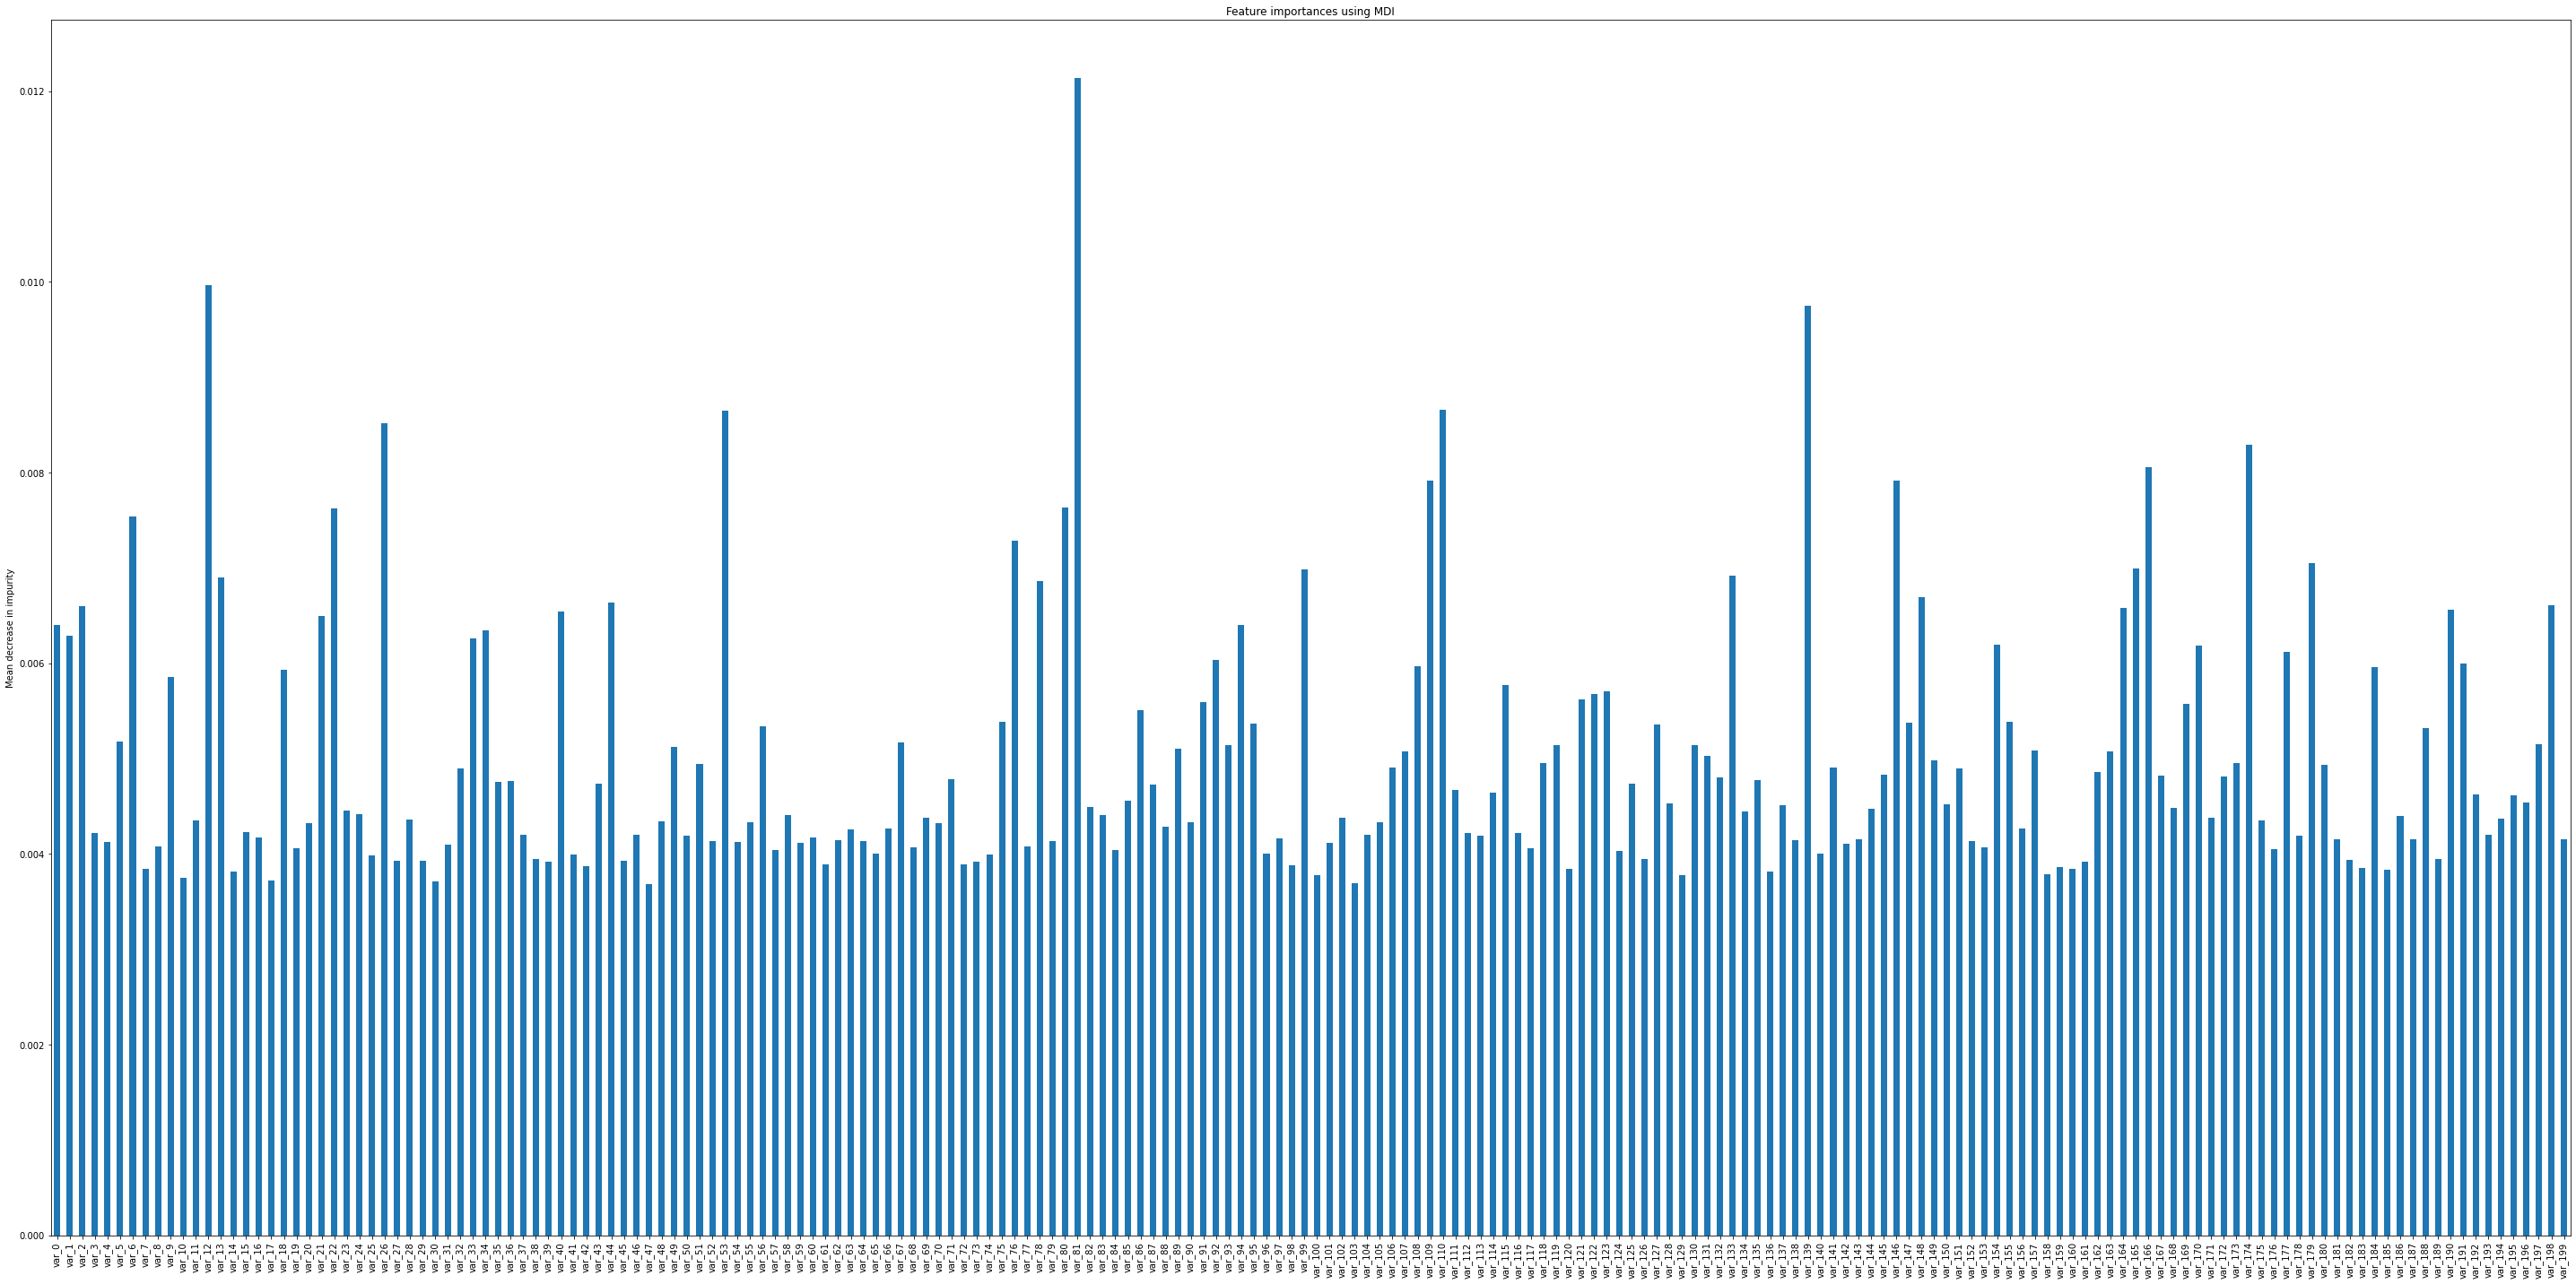

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot(kind='bar', figsize=(40,20))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Se comprueba que las importancias relativas de las columnas se mueven en un rango de (0.003, 0.012), por lo que no hay una diferencia considerable entre los valores que nos permita eliminar columnas sin perder mucha información